# Тема 1. Первичный анализ данных

## Agenda
В данном разделе вы познакомитесь с основными библиотеками python для анализа данных: pandas, matplotlib и попробуете на практике провести анализ и сделать выводы по исходным данным.
В качестве исходных данных был выбран датасет титаника (https://www.kaggle.com/c/titanic/data).

## Jupyter notebook
В качестве среды разработки используется Jupyter notebook. Основными достоинствами которого являются:
* Возможность выполнения кода ячейками
* Генерация выходного файла в виде python кода, pdf или html страницы
* Отображение графиков прямо внутри тетради
* Возможность использовать LaTeX, Markdown и HTML разметку для большей наглядности

## Основные операции в Jupyter notebook
* Ячейка - базовая еденица jupyter
* Shift + Enter - Выполнить ячейку кода
* Esc - Войти в управляющий режим
* a - создать ячейку на уровень выше, находясь в управляющем режиме
* b - создать ячейку на уровень ниже, находясь в управляющем режиме
* dd - удалить ячейку в управляющем режиме
* shift + tab - вывести сигнатуру функции

## Описание датасета "Титаник"

Потопление титаника является одним из самых ужасных крушений в истории. 15 апреля 1912 во время своей первого рейса, титаник столкнулся с айсбергом и затонул, что повлекло смерти 1502 человек из 2224 пассажиров и комманды. Эта сенсационная трагедия шокировала международное сообщество и повлекло за собой более чщательное регулирование судостроительства.

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

Одна из причин, почему крушение повлекло столько потерь заключалась, в том, что не было в достаточном количество спасательных шлюпок как для пассажиров, так и для команды. Так или иначе в выживании сыграла роль не только удача, неготорые группам людей больше удалось выжить, чем остальным, к таким группам относятся женщины, дети, и пассажиры купившие билет первого класса.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Набор данных содержит записи о пассажиров титаника и состоит из следующих столбцов:

| Столбец   |      Определение      |  Значения |
|----------|----------------------------|-------------------|
| survival | Выжил | 	0 = Нет, 1 = Да
| pclass   | Класс билета  |	1 = Первый, 2 = Второй, 3 = Третий
| sex 	   | Пол | male = Мужской, female = Женский 	
| Age 	   | Возраст в годах | Количественный тип
| sibsp    | Количество братьев и сестер | Количественный тип
| parch    | Количество родителей и детей |	Количественный тип
| ticket   | Номер билета 	| Количественный тип
| fare 	   | Цена	| Количественный тип
| cabin    | Кабина |	
| embarked | Место посадки |

## Библиотека Pandas

In [1]:
# Загрузим необходимы библиотеки
import pandas as pd
pd.set_option('display.max.columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
# Библиотека с математическими операциями над матрицами, 
# которая лежит в основе pandas
import numpy as np

# Для возможности вывода картинок прямо в тетрадь
%matplotlib inline 

In [2]:
# Загрузка дата сета
data = pd.read_csv("datasets/titanic_train.csv", index_col="PassengerId")

# Вывод на экран первых 5 записей
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


При просмотре исходных данных очень удобно просмотреть несколько как записей начиная с начала, так и несколько записей начиная с конца. В pandas для этого используются такие методы как **head(n)**, в который передается количество записей и результатом данной функции будет первые n записей. **tail(n)** позволяет получить n последний записей.

Для получеия значений отдельного столбца, его название записывается в фигурных скобках - **dataset["columnName"]**, либо можно обратится через точку - **dataset.columnName**

Основные операции с данными в pandas представлены в документации на данной странице - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [3]:
# Выведем имена первых 10 пасажиров
data["Name"].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [4]:
# Для обращения к нескольким столбцам
# необходимо передать список из названий стобцов
data[["Name", "Age"]].head(10)

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


Если необходимо получить значения каких-либо определенных строк или столбцов, то в таких случаях используется метод iloc.
Для получения среза элементов необходимо записать границы через символ ":", например data.iloc[1:5, :] - вернет строчки с индексами от 0 до 4 (не включая 5) и все столбцы

In [5]:
# Получаем 5-ю строчку, 2 и 3 столбцы
data.iloc[5, 2:4]

Name    Moran, Mr. James
Sex                 male
Name: 6, dtype: object

**pd.loc** позволяет выводить срез не по индексам, а по именам, причем промежуток в отличии от iloc включает все границы

In [6]:
# получение 2 и 3 строки столбцов с имени до возраста
data.loc[2:3, "Name":"Age"]

,Name,Sex,Age
PassengerId,,,
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,"Heikkinen, Miss. Laina",female,26.0


Для фильрации строк в dataframe необходимо условие фильтрации записать в фигурных скобках. Например data[data["Survived"] == 1] выведет все записи, в которых люди считаются выжившими

In [7]:
data[data["Survived"] == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Получим данные о размерности
lines, cols = data.shape
print("Количество строк = {}\nКоличество стоблцов = {}".format(lines, cols))

# Выведем названия стобцов
print(data.columns)

Количество строк = 891
Количество стоблцов = 11
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Получим информацию о датасете и типах внутри него
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


Как видно из данных, датасет содержит 891 запись, но далеко не все ячейки содержат данных. Поле возраста (Age) заполнено только для 714 записей, а поле занятой кабины (Cabin) только для 204. 
Существует множество различных способов как можно поступить в данной ситуации:
* Удалить строки с пропусками
* Заполнить пропуски средним значением или модой (наиболее часто встречающимся значением)
* и тд


In [10]:
# Получение информации о распределении значений каждого из столбцов
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Вывод количества спасшихся пассажиров
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
# Вывод количества людей севших на корабль в одном из портов
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Для группировки по отдельным столбцам используется функция group_by, которая обычно используется в связке с друмифи функциями. Давайте попробуем определить какого пола больше садилось на корабль на том или ином причале

In [13]:
data.groupby("Embarked")["Sex"].value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

При анализе данных бывает учень удобно сравнить несколько стоблцов между собой. Для таких случаев существуют сводные таблицы. Сводные таблицы реализует метод **crosstab**, в который необходимо передать исследуемые стоблцы.

In [14]:
# Создание сводной таблицы между полом и выживаемостью
pd.crosstab(data["Sex"], data["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


Как видно большинству женщин удалось спастить, а мужчины в основном погибли. Эта информаци яможет быть полезной при построении предсказательной модели выживаемости того или иного пассажира.

Как вы помните исходные данные содержат пропуски. Для использования данных на предсказательных моделях необходимо избавится от пропусков.

Поле возраста можно заполнить средними значениями по всем данным. Для этого используем функцию **fillna(value)**, которая заполняет пустые значения значением value. Для вычисления среднего значения по всему возрасту применим функцию **mean()**

Столбец Embarked не заполнен только в 2-х местах, поэтому эти записи можно без сильных потерь для информативности датасета удалить. 

In [15]:
# Дополним пустые ячейки средним значением
data["Age"] = data["Age"].fillna(data["Age"].mean())

# Создадим дубликат датасета без стоблца Cabin и удалим записи содержащие пустые ячейки
data_full = data.drop("Cabin", axis=1).dropna()

In [16]:
# Проверим новый датасет
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


Для применения данных в моделях машинного обучения их необходимо привести к числовому виду. К примеру, в нашем датасете пол обозначен строковым типом данных, их необходимо преобразовать в числовой. С этой задачей отлично справляется метод **map**. В данный метод необходимо передать словарь замен и в результате будет получен вектор с заменеными данными.

In [17]:
# Заменяем строку "male" на 0, "female" на 1
data_full["gender"] = data_full["Sex"].map({"male": 0, "female": 1})
data_full["gender"].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: gender, dtype: int64

К каждому элементу строки или столбца матрицы можно применить произвольную функцию, для этих целей в DataFrame описан метод apply, аргументами которого являются функция и направление замены. НАпример операцию замены значений можно выполнить через фукнцию apply следующим образом

In [18]:
def genderApply(value):
    if value == "male":
        return 0
    else:
        return 1

data_full["Sex"].apply(genderApply).head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: int64

## Библиотека Matplotlib и ее обертка Seaborn

Во время анализа данных очень бывает удобно построить различные графики для наглядной демонстрации, в таких случаях особо полезноя является библиотека matplotlib и ее более красивая обертка - Seaborn

Для построения графиков в matplot используется функция plot основными аргументами которой являются:
* Значения оси абцисс
* Значения оси ординат
* Тип рисования: прямая, точки и тд
* Цвет точек

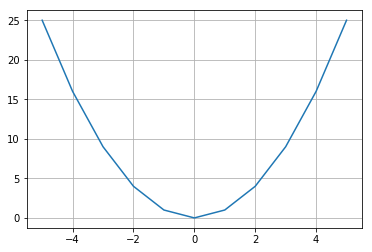

In [19]:
# Построение параболы
X = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Y = [25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25]
plt.plot(X, Y)
plt.grid(True)

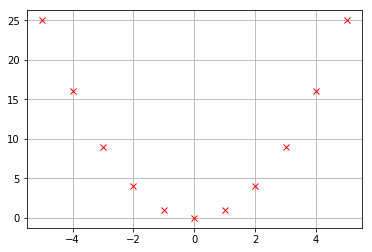

In [20]:
# Если хотим на графике отметить только точки, то можно 3-м параметром в функции plot передать вид точек
# для изменения цвета в параметр точек так же передается символ цвета, r - red, b - blue и тд
plt.plot(X, Y, "rx")
plt.grid(True)

Для создания внещнего вида графиков в matplot существует множество функций, ниже перечислены некоторые из них:
* grid(True|False) - Рисовать сетку на графика или нет
* plt.xlabel(labelName) - Подпись оси абцисс
* plt.ylabel(labelName) - Подпись оси ординат
* plt.title(titleName) - Название графика

В Pandas сущесвует поддержка рисования графиков при помощи matplotlib, для этого достаточно просто вызвать функцию plot. Рассмотрим это на примере построения графика изменения возраста.

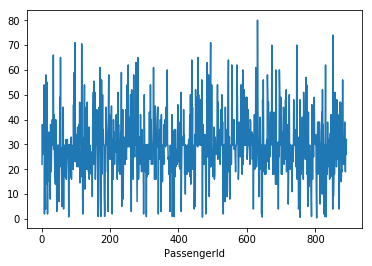

In [21]:
data["Age"].plot()

В функцию plot можно передать тип графика, например Bar, в результате чего будет построена гристограмма следующего вида

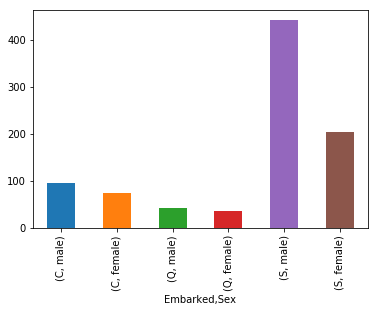

In [22]:
data.groupby("Embarked")["Sex"].value_counts().plot(kind="Bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000146C54C89E8>,
      dtype=object)

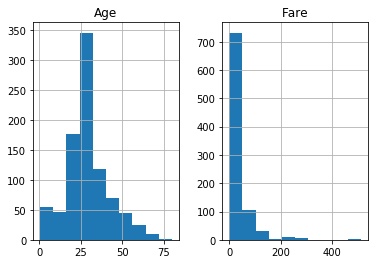

In [23]:
# Построение гистограммы по признаку возраста и цены билета
data[["Age", "Fare"]].hist()

Seaborn — это более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.
Первым типом графиков будет distplot - данный график показывает распределение цены билета

c:\users\nellrun\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Цена билета')

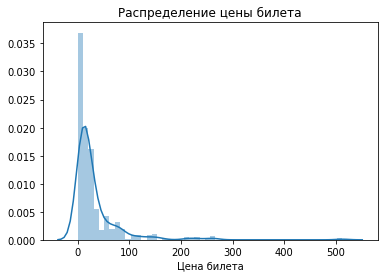

In [24]:
sns.distplot(data["Fare"])
plt.title("Распределение цены билета")
plt.xlabel("Цена билета")

Как видно из представленного графика большинство билетов стоили 10-15 у.е. и всего пара билетов имели цену больше 300

Для построения матрицы корреляции используется функция heatmap

Text(0.5,1,'Матрица корреляции')

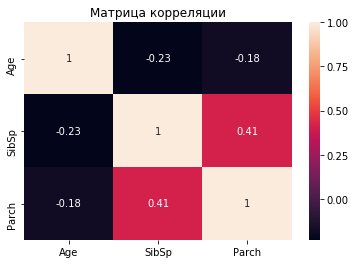

In [25]:
sns.heatmap(data_full[["Age", "SibSp", "Parch"]].corr(), annot=True)
plt.title("Матрица корреляции")

Для вывода количества элементов существует countplot(x, hue, data), где x - название столбца, которые будет использоваться для оси Х, hue - название столбца для оси Y, data - матрица с данными

Text(0,0.5,'Количество')

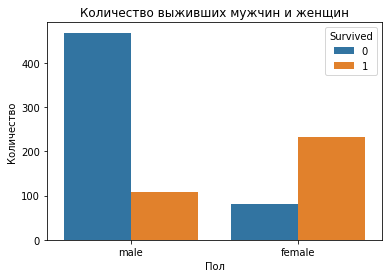

In [26]:
sns.countplot(x="Sex",hue="Survived", data=data) 
plt.title("Количество выживших мужчин и женщин")
plt.xlabel("Пол")
plt.ylabel("Количество")

Еще одним полезным графиком является pairplot, он позволяет посмотреть различные зависимости между признаками

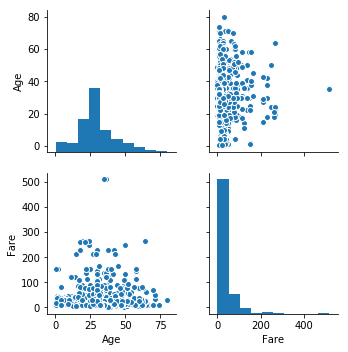

In [27]:
sns.pairplot(data[["Age", "Fare"]])

## Задание на лабораторную работу

В данном задании вам необходимо загрузить данные о людях, который находится по пути "datasets/adult.data.csv". Данный датасет содержит страну проживания, образования работу и зарплаты различных людей. 

| Столбец   |      Определение      |  Значения |
|----------|---------|------:|
| age | Возраст | 	Количественный тип
| workclass   | Занятость |	Гос. рабочий, самозанятый, волонтер, безработный и тд
| education 	   | Образование | 11 классов, Высшее, колледж и тд
| education-num 	   | Количество высших | Количественный тип
| marital-status    | Семейное положение | Женат\Замужем, холост, вдова\вдовец, разведенный и тд
| occupation    | Сфера занятости |	Тех поддержка, продажи, транспорт и тд
| race   | Раса	| Белый, азиат, темнокожий и тд
| sex | Пол | Мужской, Женский
| hours-per-week | Рабочих часов в неделю | Количественный тип
| native-country | Родная страна | США, Россия, Великобритания и тд
| salary 	   | Зарплата	| Количественный тип

In [28]:
# Загрузка данных
adultData = pd.read_csv("datasets/adult.data.csv")

### Задание 1

Как много мужчин и женщин представлено в данном датасете? (Столбец Sex)

### Задание 2

Какой средний возраст у женщин? (Столбец age)

### Задание 3

Каков процент жителей германии, по отношению ко всем людям? (Столбец native-country)

### Задание 4

Постройте гистограмму популярности различных типов образований. Используйте столбец Education

### Задание 5

Какое среднее значение людей получающих зарплату больше 50 тыс и тех, кто меньше?

### Задание 6

Подтвердите гипотезу, что люди имеющие высшее образование получаю больше 50 тысяч. У людей имеющих высшее образование в столбце образование стоят значения - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature

### Задание 7

Какое максимальное количество часов в неделю работают люди? Как много людей работают столько времени и какой процент от людей получающих больше 50 тыс. среди них.

## Линейная регрессия

Линейная регрессия является одной из самый простых моделей машинного обучения.  
Ее общая формула выглядит следующим образом:  
$$h(x)=\sum_{i=0}^n x_i*w_i + b$$
где:  
$x$ - исходные данные  
$w$ - веса линейной регрессии  
$b$ - смещение  
$n$ - количество столбцов в обучающем примере  
  
Как видно из формулы, это обычная прямая. Но если производить преобразование входных данных до передачи в линейную регрессии, то можно апроксимировать более сложные функции, как например окружность или параболу  
Основным подходом в обучении линейной регрессии является поиск минимума функции ошибки. Обычно в качестве функции ошибки берется среднеквадратичная ошибка, которая записывается следующим образом:  
$$L=\frac{1}{2m} * \sum_{i=0}^n(h(x_i)-y_{true, i})^2$$
где:  
$m$ - количество примеров в обучающей выборке  
$h(x_i)$ - функция линейной регресси, формула которой представлена выше  
$y_{true, i}$ - истинное выходное значение для обучающего примера i  
  
Таким образом задачей линейной регрессии является подбор таких весовых коэффициентов, чтобы значение функции ошибки было минимально.  

Найдя частные производные функции ошибки по каждому из весов можно вычислить градиент, который указывает направление скорейшего возрастания функции, но если двигаться в противоположную сторону от направления градиента, то это будет направления скорейшего убывания. Данный подход получил название градиентный спуск. Именно он используется для обучения линейной регрессии.

В данной лабораторной работе используется библиотека scikit-learn, в которой реализованно множество моделей машинного обучения, в том числе и линейная регрессия. 

In [29]:
# импортируем линейную регрессию и функцию разделения на тестовую и обучающую выборку
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# И тренировочные датасеты
import sklearn.datasets

In [30]:
# Загрузим тренировочный датасет с ценами на бостонскую недвижимость
boston = sklearn.datasets.load_boston()

In [31]:
# Выведем описание 
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [32]:
# Загрузим как датафрейм в pandas
data = pd.DataFrame(data=boston["data"], columns=boston['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
# Посмотрим информацию о типах данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [34]:
# Проверим распределение
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


c:\users\nellrun\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Распределение цен в датасете')

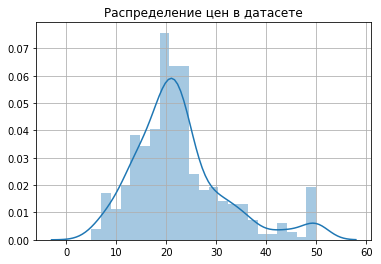

In [35]:
# Визуализируем распределение целевой переменной
sns.distplot(boston["target"])
plt.grid(True)
plt.title("Распределение цен в датасете")

In [36]:
# Разделим и перемешаем данные на обучающую и тестовую выборку в размере 8 к 2
X_train, X_test, y_train, y_test = train_test_split(data.values, boston["target"],
                                                    test_size=0.2, random_state=40,
                                                   shuffle=True)

In [37]:
# Проверим размеры
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

(0, 500)

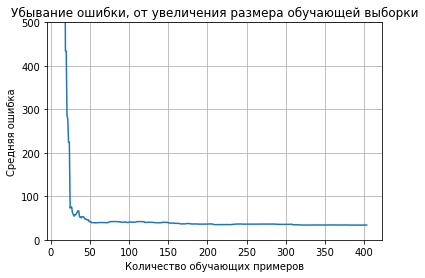

In [38]:
# Построим график ошибки от количества примеров в обучающей выборке с шагом в 10

# Создадим модель
regModel = LinearRegression()

errors = []
for i in range(15, X_train.shape[0], 1):
    # Обучим модель
    regModel.fit(X_train[:i], y_train[:i])
    # вычислим среднюю ошибку
    error = np.sum(np.square(regModel.predict(X_test) - y_test))/y_test.shape[0]
    errors.append(error)

# Строим график
plt.plot(range(15, X_train.shape[0], 1), errors)
plt.grid(True)
plt.title("Убывание ошибки, от увеличения размера обучающей выборки")
plt.ylabel("Средняя ошибка")
plt.xlabel("Количество обучающих примеров")
# Изменим интервал оси y для наглядности
plt.ylim(0, 500)

In [39]:
# Проверим итоговую ошибку
print("Error = {}".format(errors[-1]))

Error = 33.89890270702765
